In [5]:
import pandas as pd
# 
from rdkit import Chem
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from tqdm.auto import tqdm
import numpy as np
import seaborn as sns
from sklearn.manifold import TSNE
import mols2grid
import matplotlib.cm as cm

In [6]:
tqdm.pandas()

In [7]:
sns.set()
sns.set(rc={'figure.figsize': (10, 10)})
sns.set_style('whitegrid')
sns.set_context('talk')

In [8]:
df = pd.read_csv("Chembl_pIC50_curated.csv")

In [9]:
df.head()

,assay,std_type,SMILES,std_value,std_units,standard_relation,activity_type,structure_curated,substance_type_name,pIC50
0,Inhibition of A-beta-42 production by inhibiti...,IC50,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,5000.0,nM,=,active,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,organic,5.301030
1,Inhibition of A-beta-42 production by inhibiti...,IC50,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,2700.0,nM,=,active,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,organic,5.568636
2,Inhibition of A-beta-42 production by inhibiti...,IC50,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,1800.0,nM,=,active,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,organic,5.744727
3,Inhibition of A-beta-42 production by inhibiti...,IC50,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,11000.0,nM,=,inactive,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,organic,4.958607
4,Inhibition of A-beta-42 production by inhibiti...,IC50,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,10000.0,nM,=,active,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,organic,5.000000


In [10]:
df['mol']=[Chem.MolFromSmiles(smile) for smile in df['SMILES']]

In [11]:
df.head()

,assay,std_type,SMILES,std_value,std_units,standard_relation,activity_type,structure_curated,substance_type_name,pIC50,mol
0,Inhibition of A-beta-42 production by inhibiti...,IC50,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,5000.0,nM,=,active,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,organic,5.301030,<rdkit.Chem.rdchem.Mol object at 0x000002BE434...
1,Inhibition of A-beta-42 production by inhibiti...,IC50,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,2700.0,nM,=,active,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,organic,5.568636,<rdkit.Chem.rdchem.Mol object at 0x000002BE434...
2,Inhibition of A-beta-42 production by inhibiti...,IC50,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,1800.0,nM,=,active,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,organic,5.744727,<rdkit.Chem.rdchem.Mol object at 0x000002BE434...
3,Inhibition of A-beta-42 production by inhibiti...,IC50,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,11000.0,nM,=,inactive,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,organic,4.958607,<rdkit.Chem.rdchem.Mol object at 0x000002BE434...
4,Inhibition of A-beta-42 production by inhibiti...,IC50,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,10000.0,nM,=,active,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,organic,5.000000,<rdkit.Chem.rdchem.Mol object at 0x000002BE434...


In [12]:
import useful_rdkit_utils as uru
df['fp']=[uru.mol2morgan_fp(mol) for mol in df['mol']]

Convert the fingerprints to an X matrix to make sklearn happy

In [13]:
X = np.stack(df.fp)

Clustering with k-means only requires a few lines of code

In [14]:
num_clusters = 8
km = KMeans(n_clusters=num_clusters,random_state=42,n_init='auto')
km.fit(X)
cluster_list = km.predict(X)

c:\Users\kiran.franklin\Anaconda3\envs\qsar\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Plot the cluster populations

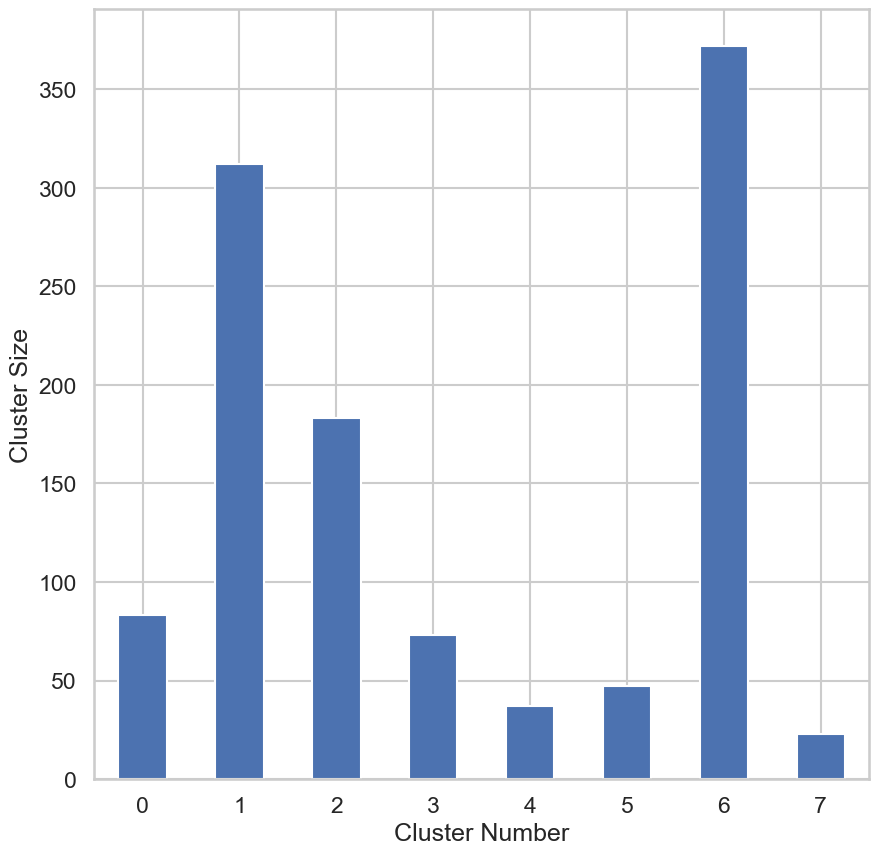

In [15]:
ax = pd.Series(cluster_list).value_counts().sort_index().plot(kind="bar")
ax.set_xlabel("Cluster Number")
ax.set_ylabel("Cluster Size")
ax.tick_params(axis='x', rotation=0)

One potential drawback of k-means clustering is that it requires you to specify the number of clusters. One means of determining the optimal number of clusters is by maximizing the silhouette score.

Silhouette Score = (a-b)/max(a,b)
 
 where a is the average intracluster distance and b is the average intercluster distance. The Silhouette Score ranges between -1 and 1 with a vaule closer to 1 representing a good match between a point and other members of the same cluster.

In [20]:
cluster_range = range(2,25)
score_list = []
for k in tqdm(cluster_range):
    km = KMeans(n_clusters=k,random_state=42,n_init='auto')
    cluster_labels = km.fit_predict(X)
    score = silhouette_score(X,cluster_labels)
    score_list.append([k,score])

  0%|          | 0/23 [00:00<?, ?it/s]

c:\Users\kiran.franklin\Anaconda3\envs\qsar\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\kiran.franklin\Anaconda3\envs\qsar\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\kiran.franklin\Anaconda3\envs\qsar\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\kiran.franklin\Anaconda3\envs\qsar\lib\site-packages\sklearn\cluster\_

Put the silhouette scores into a dataframe

In [21]:
score_df = pd.DataFrame(score_list,columns=["K","Silhouette Score"])
score_df.head()

,K,Silhouette Score
0,2,0.100005
1,3,0.064937
2,4,0.082365
3,5,0.087106
4,6,0.087570


Plot the silhouette scores as a function of the number of clusters

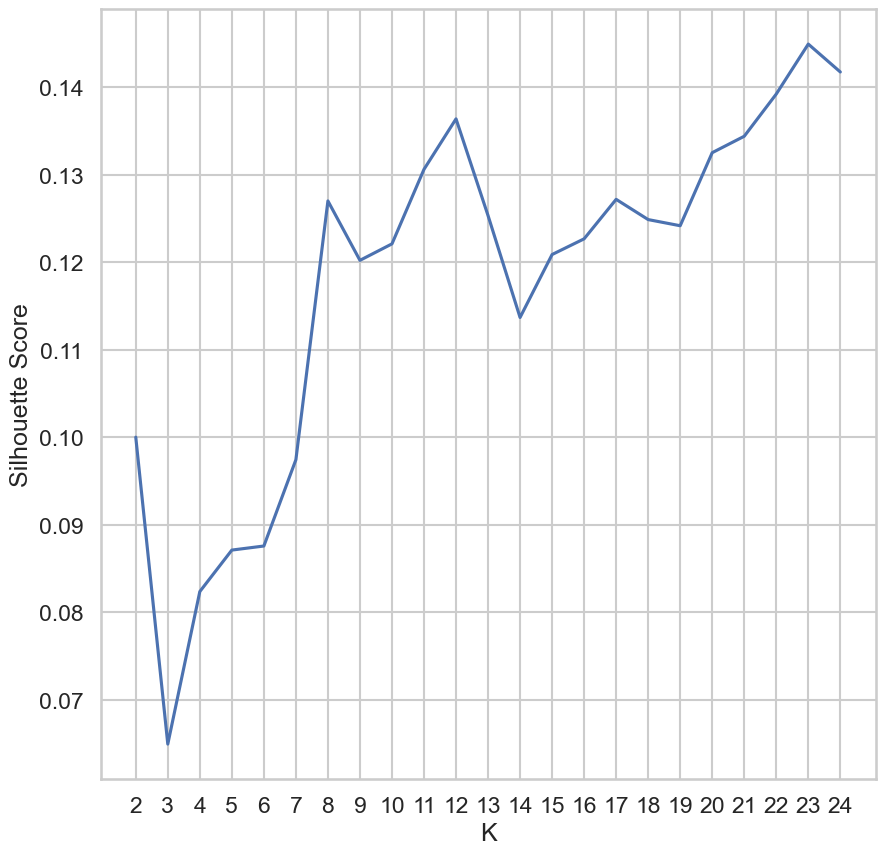

In [22]:
ax = sns.lineplot(x="K",y="Silhouette Score",data=score_df)
ax.set_xticks(cluster_range)

In the figure above the minimum silhouette score is observed with 3 clusters. Let's run KMeans with num_clusters = 3.

In [23]:
num_clusters = 3
km_opt = KMeans(n_clusters=num_clusters, random_state=42, n_init="auto")
clusters_opt = km_opt.fit_predict(X)

c:\Users\kiran.franklin\Anaconda3\envs\qsar\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Routine to plot a silhouette plot

In [24]:
def silhouette_plot(X,cluster_labels):
    """
    Adapted from https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
    """
    sns.set_style('whitegrid')
    sample_df = pd.DataFrame(silhouette_samples(X,cluster_labels),columns=["Silhouette"])
    sample_df['Cluster'] = cluster_labels
    n_clusters = max(cluster_labels+1)
    color_list = [cm.nipy_spectral(float(i) / n_clusters) for i in range(0,n_clusters)]
    ax = sns.scatterplot()
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    silhouette_avg = silhouette_score(X, cluster_labels)
    y_lower = 10
    unique_cluster_ids = sorted(sample_df.Cluster.unique())
    for i in unique_cluster_ids:
        cluster_df = sample_df.query('Cluster == @i')
        cluster_size = len(cluster_df)
        y_upper = y_lower + cluster_size
        ith_cluster_silhouette_values = cluster_df.sort_values("Silhouette").Silhouette.values
        color = color_list[i]
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                    0, ith_cluster_silhouette_values,
                    facecolor=color, edgecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * cluster_size, str(i),fontsize="small")
        y_lower = y_upper + 10
    ax.axvline(silhouette_avg,color="red",ls="--")
    ax.set_xlabel("Silhouette Score")
    ax.set_ylabel("Cluster")
    ax.set(yticklabels=[]) 
    ax.yaxis.grid(False) 

Plot a sihouette plot for the clustering above. When we do this, we're looking for two things.

How uniform are the sizes of the clusters (represeneted by the widths of the bars in the plot below).
How consistent are the Silhoutte Scores for the inidividual clusters.

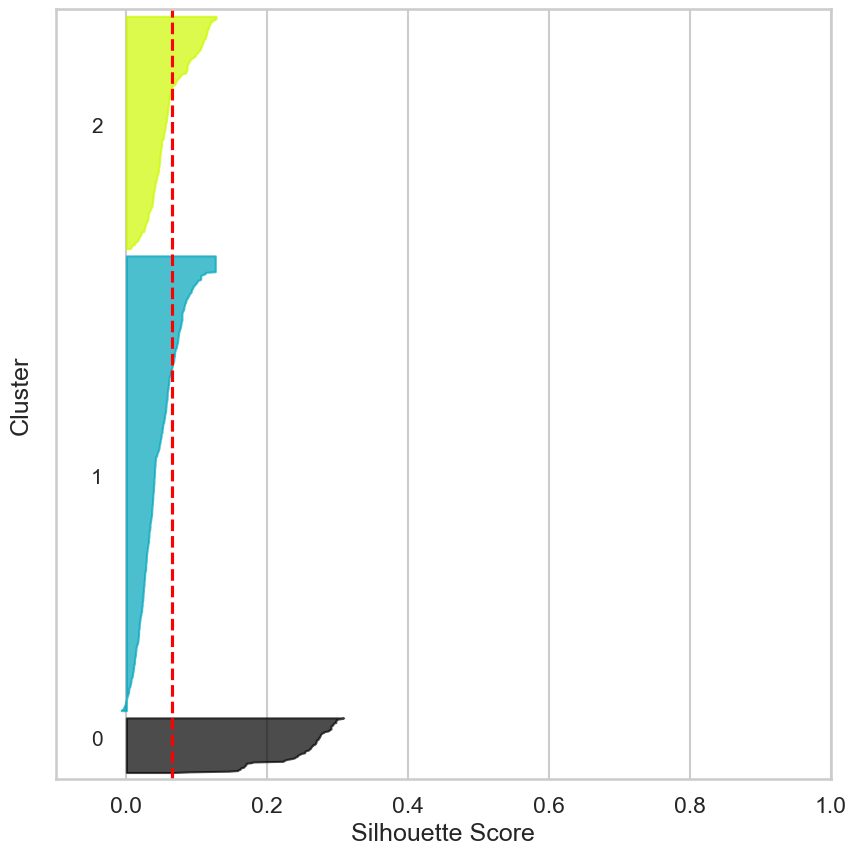

In [25]:
silhouette_plot(X,clusters_opt)

Make a TSNE plot of the clustering

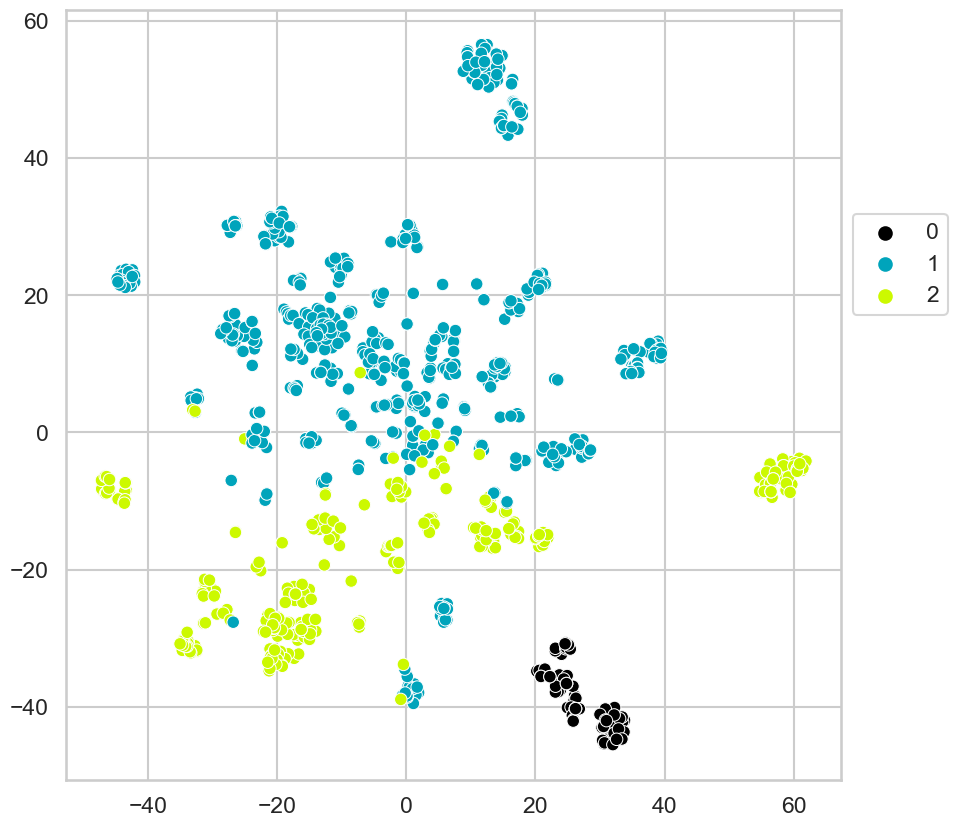

In [26]:
tsne = TSNE(n_components=2, init='pca',learning_rate='auto')
crds = tsne.fit_transform(X,clusters_opt)
color_list = [cm.nipy_spectral(float(i) / num_clusters) for i in range(0,num_clusters)]
ax = sns.scatterplot(x=crds[:,0],y=crds[:,1],hue=clusters_opt,palette=color_list,legend=True)
ax.legend(loc='upper left', bbox_to_anchor=(1.00, 0.75), ncol=1);

Add a cluster column to our input dataframe

In [27]:
opt_cluster_df = df.copy()
opt_cluster_df['Cluster'] = clusters_opt

In [28]:
opt_cluster_df.head()

,assay,std_type,SMILES,std_value,std_units,standard_relation,activity_type,structure_curated,substance_type_name,pIC50,mol,fp,Cluster
0,Inhibition of A-beta-42 production by inhibiti...,IC50,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,5000.0,nM,=,active,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,organic,5.301030,<rdkit.Chem.rdchem.Mol object at 0x000002BE434...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
1,Inhibition of A-beta-42 production by inhibiti...,IC50,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,2700.0,nM,=,active,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,organic,5.568636,<rdkit.Chem.rdchem.Mol object at 0x000002BE434...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",1
2,Inhibition of A-beta-42 production by inhibiti...,IC50,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,1800.0,nM,=,active,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,organic,5.744727,<rdkit.Chem.rdchem.Mol object at 0x000002BE434...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
3,Inhibition of A-beta-42 production by inhibiti...,IC50,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,11000.0,nM,=,inactive,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,organic,4.958607,<rdkit.Chem.rdchem.Mol object at 0x000002BE434...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
4,Inhibition of A-beta-42 production by inhibiti...,IC50,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,10000.0,nM,=,active,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,organic,5.000000,<rdkit.Chem.rdchem.Mol object at 0x000002BE434...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1


Display structures of the cluster members

In [29]:
cluster_id = 1
cols = ["SMILES","Cluster"]
display_df = opt_cluster_df[cols].query("Cluster == @cluster_id")
mols2grid.display(display_df,subset=["img"],n_cols=3,size=(320,240))

MolGridWidget()